In [38]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import time
plt.rcParams['figure.figsize'] = (13.0, 5.0)

# Regression

In [39]:
x_train = torch.rand(100)*20 - 10
y_train = torch.sin(x_train)

Text(0.5, 1.0, 'sin(x)')

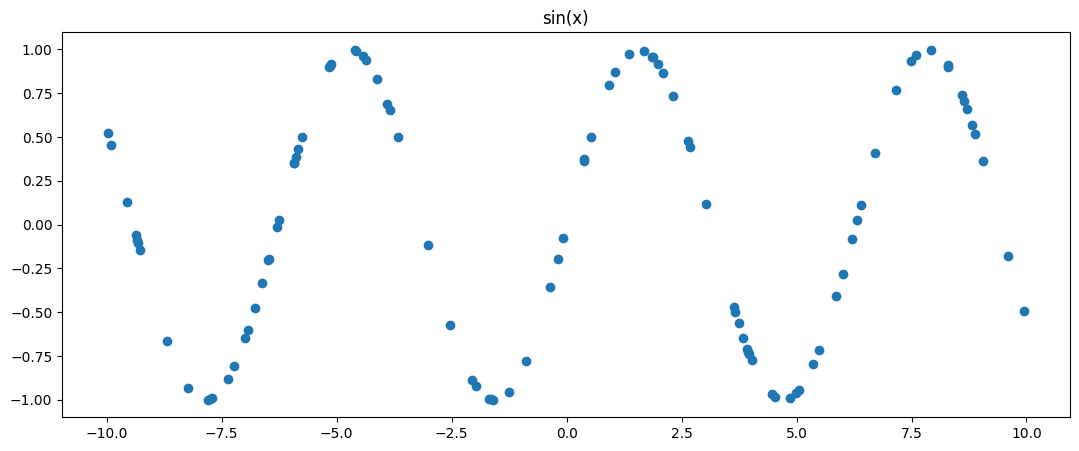

In [40]:
plt.plot(x_train, y_train, 'o')
plt.title('sin(x)')

In [41]:
noice = torch.rand(y_train.shape)/8
y_train = y_train + noice

Text(0.5, 1.0, 'noicy sin(x)')

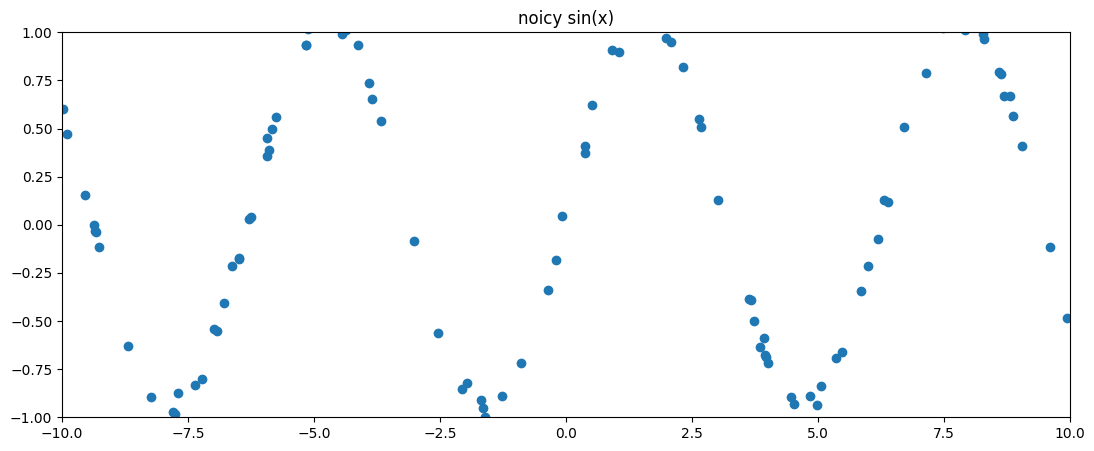

In [42]:
plt.plot(x_train, y_train, 'o')
plt.axis([-10, 10, -1, 1])
plt.title('noicy sin(x)')

In [43]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [44]:
x_val = torch.linspace(-10, 10, 100)
y_val = torch.sin(x_val.data)

Text(0.5, 1.0, 'sin(x)')

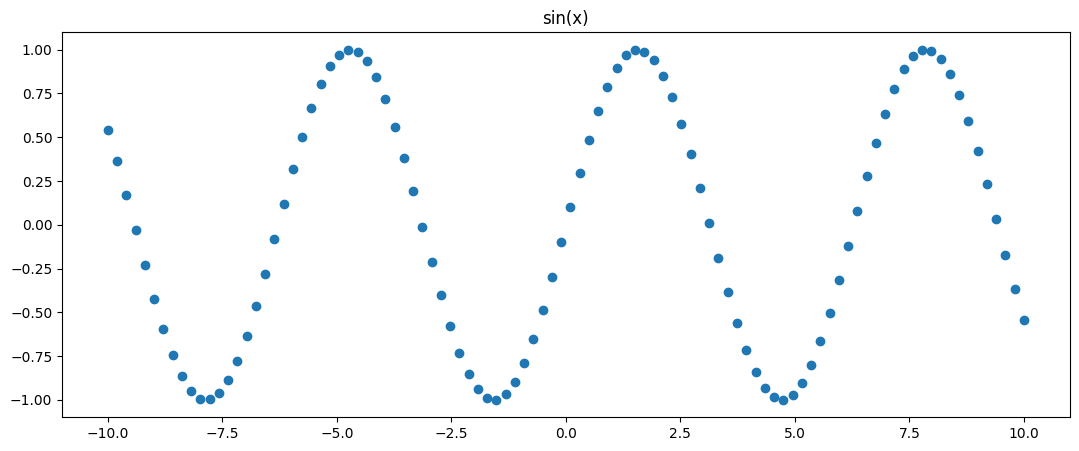

In [45]:
plt.plot(x_val, y_val, 'o')
plt.title('sin(x)')

In [46]:
x_val.unsqueeze_(1)
y_val.unsqueeze_(1);

In [47]:
class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.n_hidden_neurons = n_hidden_neurons
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [48]:
net = Net(100)

In [49]:
def predict(net: Net, x: torch.Tensor, y: torch.Tensor):
    y_pred = net.forward(x)
    plt.plot(x, y_pred.data.numpy(), 'o', label = 'prediction data', c = 'red')
    plt.plot(x, y, 'o', label = 'validation data', c = 'blue')
    plt.title('comparsion')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    

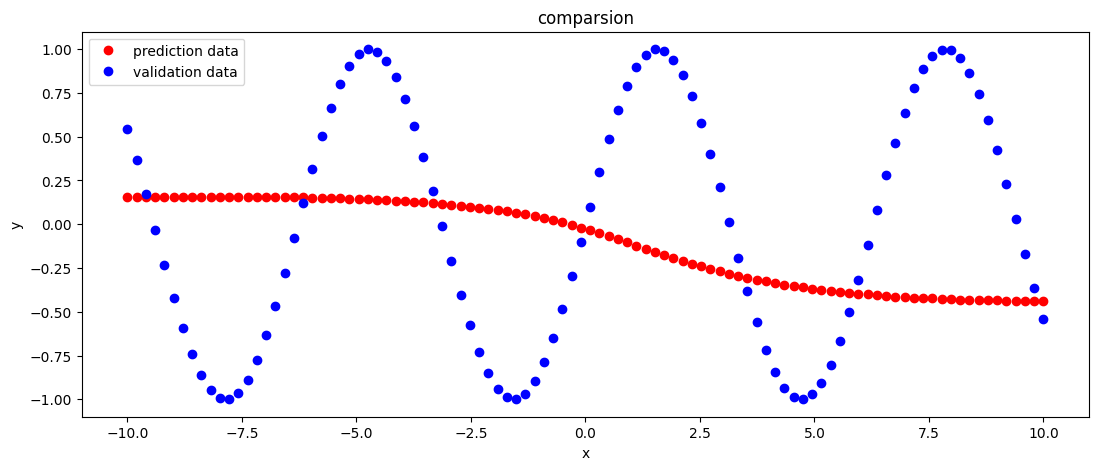

In [50]:
predict(net, x_val, y_val)

In [51]:
def loss(pred, target):
    return ((pred-target)**2).mean()

In [52]:
optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)

In [53]:
for epoch in range(3000):
    optimizer.zero_grad()
    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()

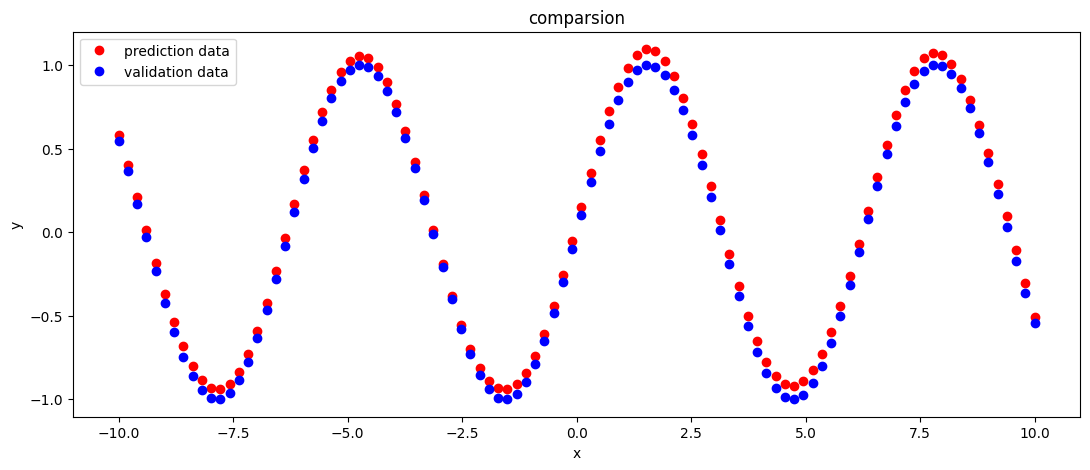

In [54]:
predict(net, x_val, y_val)

In [55]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n)
        self.fc2 = torch.nn.Linear(n, n)
        self.fc3 = torch.nn.Linear(n, 1)
        self.act1 = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act1(x)
        x = self.fc3(x)
        return x
net = RegressionNet(100)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    return (pred - target).abs().mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()


def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())


0.027179570868611336


# Classification

In [140]:
import sklearn.model_selection 
import sklearn.datasets as datasets

In [151]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [152]:
wine = datasets.load_wine()

In [153]:
pd.DataFrame(wine.data, columns = wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [197]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
wine.data[:, :2],
wine.target,
test_size=0.3,
shuffle = True,
random_state=0)
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train).long()
y_test = torch.Tensor(y_test).long()

In [239]:
class Classifier(torch.nn.Module):
    def __init__(self, n):
        super().__init__()
        self.fc1 = torch.nn.Linear(2, n)
        self.fc2 = torch.nn.Linear(n, n)
        self.fc3 = torch.nn.Linear(n, 3)
        self.act1 = torch.nn.Sigmoid()
        self.act2 = torch.nn.Sigmoid()
        self.sm1 = torch.nn.Softmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
    def iference(self, x):
        x = self.forward(x)
        x = self.sm1(x)
        return x

In [240]:
net = Classifier(25)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 1e-3)

In [ ]:
batch_size = 10
for epoch in range(5001):
    batch_order = np.random.permutation(len(x_train))
    for start_ind in range(0,len(x_train),batch_size):
        optimizer.zero_grad()
        batch_inds = batch_order[start_ind:start_ind+batch_size]
        x_batch = x_train[batch_inds]
        y_batch = y_train[batch_inds]
        y_batch_pred = net.forward(x_batch)
        loss_val = loss(y_batch_pred, y_batch)
        loss_val.backward()
        optimizer.step()
    y_pred = net.iference(x_test).argmax(dim=1)
    acc = (y_test==y_pred).float().mean()
    if acc >= 0.95:
        print(acc)
        break
    if epoch%100==0:
        y_pred = net.forward(x_test).argmax(dim=1)
        print((y_test==y_pred).float().mean())

In [235]:
xs = torch.linspace(-5,5,steps=5)
ys = torch.linspace(-5,5,steps=5)
x,y = torch.meshgrid(xs,ys, indexing = 'xy')

In [236]:
x

tensor([[-5.0000, -2.5000,  0.0000,  2.5000,  5.0000],
        [-5.0000, -2.5000,  0.0000,  2.5000,  5.0000],
        [-5.0000, -2.5000,  0.0000,  2.5000,  5.0000],
        [-5.0000, -2.5000,  0.0000,  2.5000,  5.0000],
        [-5.0000, -2.5000,  0.0000,  2.5000,  5.0000]])

In [237]:
y

tensor([[-5.0000, -5.0000, -5.0000, -5.0000, -5.0000],
        [-2.5000, -2.5000, -2.5000, -2.5000, -2.5000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 2.5000,  2.5000,  2.5000,  2.5000,  2.5000],
        [ 5.0000,  5.0000,  5.0000,  5.0000,  5.0000]])

In [238]:
xs

tensor([-5.0000, -2.5000,  0.0000,  2.5000,  5.0000])